In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install transformers

In [3]:
import pandas as pd

df_10k = pd.read_csv("/content/drive/MyDrive/RAISE25/Competition_Materials_SHARE/Dataset_10k.csv")
df_multilingual = pd.read_csv("/content/drive/MyDrive/RAISE25/Competition_Materials_SHARE/Dataset_multilingual.csv")

print("Dataset 10K Info:")
df_10k.info()
print("\nMultilingual Dataset Info:")
df_multilingual.info()

Dataset 10K Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  10000 non-null  int64 
 1   date                        10000 non-null  object
 2   title                       10000 non-null  object
 3   source                      10000 non-null  object
 4   number_of_characters_title  10000 non-null  int64 
 5   number_of_words_title       10000 non-null  int64 
 6   day_of_week                 10000 non-null  object
 7   month                       10000 non-null  object
 8   year                        10000 non-null  int64 
 9   quarter                     10000 non-null  int64 
 10  is_weekend                  10000 non-null  bool  
 11  category                    10000 non-null  object
dtypes: bool(1), int64(5), object(6)
memory usage: 869.3+ KB

Multilingual Dataset Info:
<

In [4]:
df_10k.head(), df_multilingual.head()

(   Unnamed: 0        date                                              title  \
 0           0  2024-10-14  will.i.am and Fyilicia on the AI revolution, i...   
 1           1  2024-02-21  Intel Launches World’s First Systems Foundry D...   
 2           2  2024-02-05     The Unique Challenges of Selling Enterprise AI   
 3           3  2024-08-28  Contentious California AI bill passes legislat...   
 4           4  2024-10-15  Exploring Genius, Creation, and Humanity in th...   
 
                                            source  number_of_characters_title  \
 0                                Evening Standard                         122   
 1  Investor Relations :: Intel Corporation (INTC)                         117   
 2                                          Emerge                          54   
 3                                         Reuters                          88   
 4                          University of Aberdeen                          82   
 
    number_of_word

In [5]:
# Drop unnecessary columns (like index columns)
df_10k = df_10k.drop(columns=["Unnamed: 0"], errors="ignore")
df_multilingual = df_multilingual.drop(columns=["Unnamed: 0"], errors="ignore")

# Add a "source" column
df_10k["source"] = "English"
df_multilingual["source"] = "Translated"

# Merge the two datasets
df_combined = pd.concat([df_10k, df_multilingual], ignore_index=True)

# Drop missing values in the "title" column
df_combined = df_combined.dropna(subset=["title"])

# Show dataset info after merging
print("Merged Dataset Info:")
df_combined.info()

# Show a preview of the cleaned dataset
df_combined.head()


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18400 entries, 0 to 18399
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date                        18400 non-null  object
 1   title                       18400 non-null  object
 2   source                      18400 non-null  object
 3   number_of_characters_title  18400 non-null  int64 
 4   number_of_words_title       18400 non-null  int64 
 5   day_of_week                 18400 non-null  object
 6   month                       18400 non-null  object
 7   year                        18400 non-null  int64 
 8   quarter                     18400 non-null  int64 
 9   is_weekend                  18400 non-null  bool  
 10  category                    18400 non-null  object
 11  language                    8400 non-null   object
dtypes: bool(1), int64(4), object(7)
memory usage: 1.6+ MB


,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,language
0,2024-10-14,"will.i.am and Fyilicia on the AI revolution, i...",English,122,20,Monday,October,2024,4,False,Other,NaN
1,2024-02-21,Intel Launches World’s First Systems Foundry D...,English,117,18,Wednesday,February,2024,1,False,Other,NaN
2,2024-02-05,The Unique Challenges of Selling Enterprise AI,English,54,9,Monday,February,2024,1,False,Career,NaN
3,2024-08-28,Contentious California AI bill passes legislat...,English,88,11,Wednesday,August,2024,3,False,Other,NaN
4,2024-10-15,"Exploring Genius, Creation, and Humanity in th...",English,82,14,Tuesday,October,2024,4,False,Other,NaN


In [6]:
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (punctuation, symbols)
    text = re.sub(r"[^\w\s]", "", text)
    # Remove multiple spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply text cleaning to the titles
df_combined["cleaned_title"] = df_combined["title"].apply(clean_text)

# Show dataset preview
df_combined.head()


,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,language,cleaned_title
0,2024-10-14,"will.i.am and Fyilicia on the AI revolution, i...",English,122,20,Monday,October,2024,4,False,Other,NaN,william and fyilicia on the ai revolution incl...
1,2024-02-21,Intel Launches World’s First Systems Foundry D...,English,117,18,Wednesday,February,2024,1,False,Other,NaN,intel launches worlds first systems foundry de...
2,2024-02-05,The Unique Challenges of Selling Enterprise AI,English,54,9,Monday,February,2024,1,False,Career,NaN,the unique challenges of selling enterprise ai
3,2024-08-28,Contentious California AI bill passes legislat...,English,88,11,Wednesday,August,2024,3,False,Other,NaN,contentious california ai bill passes legislat...
4,2024-10-15,"Exploring Genius, Creation, and Humanity in th...",English,82,14,Tuesday,October,2024,4,False,Other,NaN,exploring genius creation and humanity in the ...


In [7]:
from transformers import pipeline

# Load pre-trained Named Entity Recognition model
ner_model = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)

# Function to extract named entities
def extract_entities(text):
    entities = ner_model(text)
    return [(ent["word"], ent["entity_group"], round(ent["score"], 3)) for ent in entities]

# Apply NER to all headlines
df_combined["extracted_entities"] = df_combined["title"].apply(extract_entities)

# Show dataset with extracted entities
df_combined.head()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,language,cleaned_title,extracted_entities
0,2024-10-14,"will.i.am and Fyilicia on the AI revolution, i...",English,122,20,Monday,October,2024,4,False,Other,NaN,william and fyilicia on the ai revolution incl...,"[(will, ORG, 0.708), (i, ORG, 0.513), (F, PER,..."
1,2024-02-21,Intel Launches World’s First Systems Foundry D...,English,117,18,Wednesday,February,2024,1,False,Other,NaN,intel launches worlds first systems foundry de...,"[(Intel Launch, ORG, 0.909), (World, ORG, 0.93..."
2,2024-02-05,The Unique Challenges of Selling Enterprise AI,English,54,9,Monday,February,2024,1,False,Career,NaN,the unique challenges of selling enterprise ai,"[(Enterprise AI, MISC, 0.583)]"
3,2024-08-28,Contentious California AI bill passes legislat...,English,88,11,Wednesday,August,2024,3,False,Other,NaN,contentious california ai bill passes legislat...,"[(California AI, MISC, 0.78)]"
4,2024-10-15,"Exploring Genius, Creation, and Humanity in th...",English,82,14,Tuesday,October,2024,4,False,Other,NaN,exploring genius creation and humanity in the ...,"[(Age of AI, MISC, 0.949)]"


In [8]:
def filter_relevant_entities(entity_list):
    relevant_types = {"ORG", "PER", "LOC", "GPE"}  # Focus on important entity types
    return [(word, entity, score) for word, entity, score in entity_list if entity in relevant_types]

# Apply filtering
df_combined["filtered_entities"] = df_combined["extracted_entities"].apply(filter_relevant_entities)

# Display dataset with filtered entities
df_combined.head()

,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,language,cleaned_title,extracted_entities,filtered_entities
0,2024-10-14,"will.i.am and Fyilicia on the AI revolution, i...",English,122,20,Monday,October,2024,4,False,Other,NaN,william and fyilicia on the ai revolution incl...,"[(will, ORG, 0.708), (i, ORG, 0.513), (F, PER,...","[(will, ORG, 0.708), (i, ORG, 0.513), (F, PER,..."
1,2024-02-21,Intel Launches World’s First Systems Foundry D...,English,117,18,Wednesday,February,2024,1,False,Other,NaN,intel launches worlds first systems foundry de...,"[(Intel Launch, ORG, 0.909), (World, ORG, 0.93...","[(Intel Launch, ORG, 0.909), (World, ORG, 0.93..."
2,2024-02-05,The Unique Challenges of Selling Enterprise AI,English,54,9,Monday,February,2024,1,False,Career,NaN,the unique challenges of selling enterprise ai,"[(Enterprise AI, MISC, 0.583)]",[]
3,2024-08-28,Contentious California AI bill passes legislat...,English,88,11,Wednesday,August,2024,3,False,Other,NaN,contentious california ai bill passes legislat...,"[(California AI, MISC, 0.78)]",[]
4,2024-10-15,"Exploring Genius, Creation, and Humanity in th...",English,82,14,Tuesday,October,2024,4,False,Other,NaN,exploring genius creation and humanity in the ...,"[(Age of AI, MISC, 0.949)]",[]


In [9]:
print(df_combined["extracted_entities"])

0        [(will, ORG, 0.708), (i, ORG, 0.513), (F, PER,...
1        [(Intel Launch, ORG, 0.909), (World, ORG, 0.93...
2                           [(Enterprise AI, MISC, 0.583)]
3                            [(California AI, MISC, 0.78)]
4                               [(Age of AI, MISC, 0.949)]
                               ...                        
18395    [(Artificial Intelligence, MISC, 0.712), (AI, ...
18396              [(Gen AI, ORG, 0.988), (US, MISC, 1.0)]
18397    [(N, LOC, 0.464), (##vid, ORG, 0.602), (AI, OR...
18398         [(Futurecom, ORG, 0.909), (AI, MISC, 0.992)]
18399    [(Santander, ORG, 0.993), (AI for Startups, MI...
Name: extracted_entities, Length: 18400, dtype: object


In [10]:
def extract_entities_final(text):
    entities = ner_model(text)

    merged_entities = []
    current_entity = None

    for ent in entities:
        word = ent["word"].replace("##", "")  # Remove BERT subword markers
        label = ent["entity_group"]
        score = ent["score"]

        # Merge consecutive subwords properly
        if current_entity and ent["start"] == current_entity["end"]:
            current_entity["word"] += word
            current_entity["score"] = max(current_entity["score"], score)
        else:
            if current_entity:
                merged_entities.append(current_entity)
            current_entity = {"word": word, "entity": label, "score": score, "start": ent["start"], "end": ent["end"]}

    if current_entity:
        merged_entities.append(current_entity)

    # Final cleanup of tokenization errors
    cleaned_entities = []
    skip_next = False

    # List of junk entities or tokens to ignore
    junk_entities = {"Cha", "E", "C", "GP"}

    # Known variations to merge directly during extraction
    ai_variants = {"ificial Intelligence", "ial Intelligence", "AI", "A I", "A.I."}

    for i, entity in enumerate(merged_entities):
        if skip_next:
            skip_next = False
            continue

        word, label, score = entity["word"], entity["entity"], entity["score"]

        # Normalize case (Optional, depends on your needs)
        word_lower = word.lower()

        # Merge common AI variations
        if word in ai_variants or word_lower in {"ai", "a.i."}:
            word = "Artificial Intelligence"
        elif word in ["ificial Intelligence", "ial Intelligence", "Artificial"]:
            if cleaned_entities:
                cleaned_entities[-1] = (cleaned_entities[-1][0] + " " + word, label, score)
            else:
                cleaned_entities.append((word, label, score))
        elif word == "A" and i + 1 < len(merged_entities) and merged_entities[i + 1]["word"] == "I":
            cleaned_entities.append(("Artificial Intelligence", label, max(score, merged_entities[i + 1]["score"])))
            skip_next = True  # Skip next token since we've merged it
        elif word in junk_entities:  # Skip known junk
            continue
        else:
            cleaned_entities.append((word, label, score))

    return cleaned_entities

# Apply this to your dataset
df_combined["extracted_entities"] = df_combined["title"].apply(extract_entities_final)

print("Final entity extraction with improved merging and junk filtering completed!")


Final entity extraction with improved merging and junk filtering completed!


In [11]:
def clean_final_entities(entity_list):
    cleaned_entities = []

    for entity in entity_list:
        word, label, score = entity

        # Merge all "Artificial Intelligence" fragments
        if word in ["ificial Intelligence", "ial Intelligence", "ial", "Artificial"]:
            word = "Artificial Intelligence"

        # Ignore meaningless fragments
        if word in ["A", "ial"]:
            continue

        cleaned_entities.append((word, label, score))

    return cleaned_entities

# Apply the final entity cleaning fix
df_combined["cleaned_entities"] = df_combined["extracted_entities"].apply(clean_final_entities)

print("Final entity cleaning completed!")


Final entity cleaning completed!


✅ Top 20 Most Common Entities (After Full Cleanup):
                       Entity  Count
17    Artificial Intelligence   1427
66                     Google    403
76                  Microsoft    286
105                        US    237
29                     OpenAI    183
136                      Meta    177
185                     Apple    166
124                    Nvidia    163
221              Intelligence    143
152                     China    130
351                        EU    126
192                    Amazon    112
238                        UK    106
23                 California     84
428                    Europe     76
2251                   Brazil     75
672             Generative AI     69
744                       AWS     68
479                  European     61
655                       Art     58


<Figure size 1200x600 with 0 Axes>

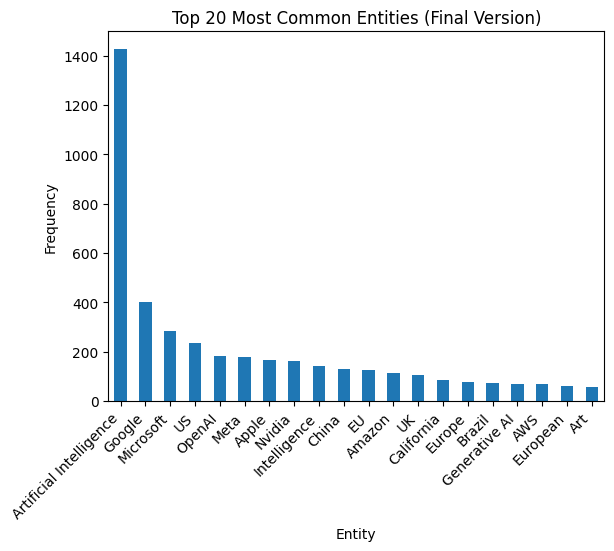

In [12]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Flatten the list of cleaned entities
all_entities = [entity[0] for entities in df_combined["cleaned_entities"] for entity in entities]

# Count occurrences of each entity
entity_counts = Counter(all_entities)

# Convert to DataFrame for visualization
df_entity_counts = pd.DataFrame(entity_counts.items(), columns=["Entity", "Count"]).sort_values(by="Count", ascending=False)

# Display the top 20 most common entities
print("✅ Top 20 Most Common Entities (After Full Cleanup):")
print(df_entity_counts.head(20))

# Plot the top 20 entities
plt.figure(figsize=(12, 6))
df_entity_counts.head(20).plot(kind="bar", x="Entity", y="Count", legend=False)
plt.xlabel("Entity")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Entities (Final Version)")
plt.xticks(rotation=45, ha="right")
plt.show()


In [14]:
entity_mapping = {
    "AI": "Artificial Intelligence",
    "Intelligence": "Artificial Intelligence",
    "ificial" : "Artificial Intelligence",
    "NVIDIA": "Nvidia",
    "U. S.": "US",
    "USA": "US",
    "EU": "European Union",
    "European": "European Union",
    "Europe": "European Union",
    "French": "France",
    "Chinese": "China",
    "rative AI": "Generative AI",
    "Nvid" : "Nvidia",
    "Japanese" : "Japan",
    "Brazilian" : "Brazil",
    "Italian" : "Italy",
    "NVI" : "Nvidia",
    "Artific" : "Artificial Intelligence",
    "GPT" : "ChatGPT",
    "U. S": "US"

}


In [42]:
from collections import Counter

# 1️⃣ Mapping Function
def apply_entity_mapping(entity_list, mapping):
    return [(mapping.get(entity[0], entity[0]), entity[1], entity[2]) for entity in entity_list]

# 2️⃣ Remove Specific Entities
def remove_specific_entities(entity_list):
    entities_to_remove = {"N", "G", "I", "S", "B", "Co", "T", "F", "U", "D"}
    return [entity for entity in entity_list if entity[0] not in entities_to_remove]

# ✅ First Stage: Mapping and Removing Noise (Without Rare Filtering Yet)
def clean_entities_stage1(entity_list, mapping):
    mapped = apply_entity_mapping(entity_list, mapping)
    without_noise = remove_specific_entities(mapped)
    return without_noise

# Apply Stage 1 Cleaning to the Column
df_combined["temp_entities"] = df_combined["cleaned_entities"].apply(lambda x: clean_entities_stage1(x, entity_mapping))

# ✅ Count Frequencies AFTER Mapping + Noise Removal
all_entities_after_stage1 = [entity[0] for entities in df_combined["temp_entities"] for entity in entities]
entity_counts_after_stage1 = Counter(all_entities_after_stage1)

frequent_entities = {entity for entity, count in entity_counts_after_stage1.items() if count >= 0}

# 3️⃣ Final Filtering by Frequency
def filter_rare_entities(entity_list, frequent_entities):
    return [entity for entity in entity_list if entity[0] in frequent_entities]

df_combined["final_entities"] = df_combined["temp_entities"].apply(lambda x: filter_rare_entities(x, frequent_entities))

# Cleanup Temporary Column
df_combined.drop(columns=["temp_entities"], inplace=True)

# Preview
df_combined[["title", "cleaned_entities", "final_entities"]].head(10)



,title,cleaned_entities,final_entities
0,"will.i.am and Fyilicia on the AI revolution, i...","[(will, ORG, 0.7079097), (i, ORG, 0.51297027),...","[(will, ORG, 0.7079097), (i, ORG, 0.51297027),..."
1,Intel Launches World’s First Systems Foundry D...,"[(Intel Launch, ORG, 0.90908504), (World, ORG,...","[(Intel Launch, ORG, 0.90908504), (World, ORG,..."
2,The Unique Challenges of Selling Enterprise AI,"[(Enterprise AI, MISC, 0.58336604)]","[(Enterprise AI, MISC, 0.58336604)]"
3,Contentious California AI bill passes legislat...,"[(California AI, MISC, 0.7799265)]","[(California AI, MISC, 0.7799265)]"
4,"Exploring Genius, Creation, and Humanity in th...","[(Age of AI, MISC, 0.94894797)]","[(Age of AI, MISC, 0.94894797)]"
5,Conversational AI improves 'fourth trimester' ...,"[(Penn, ORG, 0.871736), (Medicine, LOC, 0.7799...","[(Penn, ORG, 0.871736), (Medicine, LOC, 0.7799..."
6,Disney harnesses AI to drive streaming ad tech...,"[(Disney, ORG, 0.9391238)]","[(Disney, ORG, 0.9391238)]"
7,Will Rinehart: Unpacking the Executive Order o...,"[(Will Rinehart, PER, 0.9991616), (Executive O...","[(Will Rinehart, PER, 0.9991616), (Executive O..."
8,Video: Where Bitcoin and Artificial Intelligen...,"[(Bitcoin, MISC, 0.7589145), (Artificial Intel...","[(Bitcoin, MISC, 0.7589145), (Artificial Intel..."
9,NVIDIA's relentless rally: AI chip giant eyes ...,"[(NVIDIA, ORG, 0.99755895)]","[(Nvidia, ORG, 0.99755895)]"


                        Entity  Count
16     Artificial Intelligence   1647
64                      Google    403
57                          US    307
18                      Nvidia    292
74                   Microsoft    286
...                        ...    ...
12359           Luft Logistics      1
12360                  AgriHub      1
12361                      bus      1
12346             Smartbreeder      1
12347           Santa Catarina      1

[12394 rows x 2 columns]


<Figure size 1200x600 with 0 Axes>

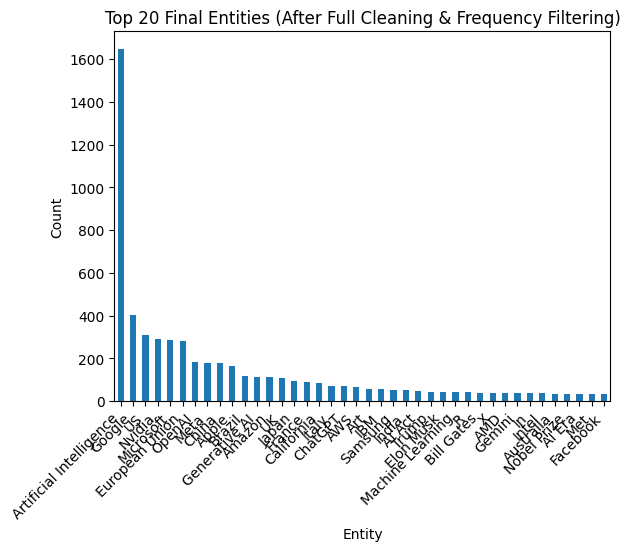

In [43]:
from collections import Counter
import pandas as pd

# Flatten the final_entities list for counting
all_final_entities = [entity[0] for entities in df_combined["final_entities"] for entity in entities]

# Count occurrences
final_entity_counts = Counter(all_final_entities)

# Convert to DataFrame
df_final_entity_counts = pd.DataFrame(final_entity_counts.items(), columns=["Entity", "Count"]).sort_values(by="Count", ascending=False)

# Preview top 20
print(df_final_entity_counts.head(13000))
import matplotlib.pyplot as plt

# Plot the top 20 entities
plt.figure(figsize=(12, 6))
df_final_entity_counts.head(40).plot(kind="bar", x="Entity", y="Count", legend=False)
plt.title("Top 20 Final Entities (After Full Cleaning & Frequency Filtering)")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [45]:
# Count rows where final_entities is an empty list
empty_final_entities_count = df_combined["final_entities"].apply(lambda x: len(x) == 0).sum()

print(f"✅ Number of rows with empty `final_entities`: {empty_final_entities_count}")

✅ Number of rows with empty `final_entities`: 5165


In [46]:
df_combined[df_combined["final_entities"].apply(lambda x: len(x) == 0)].head()

,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,language,cleaned_title,extracted_entities,filtered_entities,cleaned_entities,final_entities
18,2024-09-19,Study: AI could lead to inconsistent outcomes ...,English,77,13,Thursday,September,2024,3,False,Education,NaN,study ai could lead to inconsistent outcomes i...,[],[],[],[]
21,2024-10-08,AI is fixing — and ruining — our photos,English,51,12,Tuesday,October,2024,4,False,Other,NaN,ai is fixing and ruining our photos,[],[],[],[]
28,2024-08-01,Nurse's Corner: How artificial intelligence af...,English,77,9,Thursday,August,2024,3,False,Other,NaN,nurses corner how artificial intelligence affe...,[],[],[],[]
29,2024-08-01,Artificial intelligence could personalize dise...,English,90,11,Thursday,August,2024,3,False,Other,NaN,artificial intelligence could personalize dise...,[],[],[],[]
31,2023-11-13,AI Focus Area,English,24,6,Monday,November,2023,4,False,Other,NaN,ai focus area,[],[],[],[]


In [47]:
def fill_empty_final_entities(entity_list):
    # If it's empty, insert 'Artificial Intelligence'
    if len(entity_list) == 0:
        return [("Artificial Intelligence", "MISC", 1.0)]  # Dummy label and score
    return entity_list


In [48]:
df_combined["final_entities"] = df_combined["final_entities"].apply(fill_empty_final_entities)


In [49]:
# Check if there are still any empty ones (should be 0)
empty_final_entities_count = df_combined["final_entities"].apply(lambda x: len(x) == 0).sum()
print(f"✅ Number of empty `final_entities` after filling: {empty_final_entities_count}")

# Preview the dataset
df_combined[["title", "final_entities"]].head(10)

✅ Number of empty `final_entities` after filling: 0


,title,final_entities
0,"will.i.am and Fyilicia on the AI revolution, i...","[(will, ORG, 0.7079097), (i, ORG, 0.51297027),..."
1,Intel Launches World’s First Systems Foundry D...,"[(Intel Launch, ORG, 0.90908504), (World, ORG,..."
2,The Unique Challenges of Selling Enterprise AI,"[(Enterprise AI, MISC, 0.58336604)]"
3,Contentious California AI bill passes legislat...,"[(California AI, MISC, 0.7799265)]"
4,"Exploring Genius, Creation, and Humanity in th...","[(Age of AI, MISC, 0.94894797)]"
5,Conversational AI improves 'fourth trimester' ...,"[(Penn, ORG, 0.871736), (Medicine, LOC, 0.7799..."
6,Disney harnesses AI to drive streaming ad tech...,"[(Disney, ORG, 0.9391238)]"
7,Will Rinehart: Unpacking the Executive Order o...,"[(Will Rinehart, PER, 0.9991616), (Executive O..."
8,Video: Where Bitcoin and Artificial Intelligen...,"[(Bitcoin, MISC, 0.7589145), (Artificial Intel..."
9,NVIDIA's relentless rally: AI chip giant eyes ...,"[(Nvidia, ORG, 0.99755895)]"


In [50]:
df_combined.head()

,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,language,cleaned_title,extracted_entities,filtered_entities,cleaned_entities,final_entities
0,2024-10-14,"will.i.am and Fyilicia on the AI revolution, i...",English,122,20,Monday,October,2024,4,False,Other,NaN,william and fyilicia on the ai revolution incl...,"[(will, ORG, 0.7079097), (i, ORG, 0.51297027),...","[(will, ORG, 0.708), (i, ORG, 0.513), (F, PER,...","[(will, ORG, 0.7079097), (i, ORG, 0.51297027),...","[(will, ORG, 0.7079097), (i, ORG, 0.51297027),..."
1,2024-02-21,Intel Launches World’s First Systems Foundry D...,English,117,18,Wednesday,February,2024,1,False,Other,NaN,intel launches worlds first systems foundry de...,"[(Intel Launch, ORG, 0.90908504), (World, ORG,...","[(Intel Launch, ORG, 0.909), (World, ORG, 0.93...","[(Intel Launch, ORG, 0.90908504), (World, ORG,...","[(Intel Launch, ORG, 0.90908504), (World, ORG,..."
2,2024-02-05,The Unique Challenges of Selling Enterprise AI,English,54,9,Monday,February,2024,1,False,Career,NaN,the unique challenges of selling enterprise ai,"[(Enterprise AI, MISC, 0.58336604)]",[],"[(Enterprise AI, MISC, 0.58336604)]","[(Enterprise AI, MISC, 0.58336604)]"
3,2024-08-28,Contentious California AI bill passes legislat...,English,88,11,Wednesday,August,2024,3,False,Other,NaN,contentious california ai bill passes legislat...,"[(California AI, MISC, 0.7799265)]",[],"[(California AI, MISC, 0.7799265)]","[(California AI, MISC, 0.7799265)]"
4,2024-10-15,"Exploring Genius, Creation, and Humanity in th...",English,82,14,Tuesday,October,2024,4,False,Other,NaN,exploring genius creation and humanity in the ...,"[(Age of AI, MISC, 0.94894797)]",[],"[(Age of AI, MISC, 0.94894797)]","[(Age of AI, MISC, 0.94894797)]"


In [51]:
# Save the combined dataset with entities and sentiment (if added)
df_combined.to_csv("/content/drive/MyDrive/RAISE25/combined_dataset_with_entities.csv", index=False)
print("Dataset saved as 'combined_dataset_with_entities.csv'. You can download it from the Colab file manager.")

Dataset saved as 'combined_dataset_with_entities.csv'. You can download it from the Colab file manager.
